In [1]:
from surprise import Reader, Dataset, KNNBasic, accuracy, SVD
from surprise.model_selection import KFold
from surprise.model_selection.validation import cross_validate
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
# read in data
ratings_df = pd.read_csv('./archive/ratings_small.csv')
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [152]:
# unbiased SVD leads to PMF
algo = SVD(biased=False)

# cross_validate() uses n-fold cross-validation based on what's passed
# to cv
cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0096  1.0149  1.0102  1.0106  1.0018  1.0094  0.0042  
MAE (testset)     0.7780  0.7852  0.7768  0.7830  0.7735  0.7793  0.0043  
Fit time          0.66    0.67    0.69    0.67    0.67    0.67    0.01    
Test time         0.06    0.06    0.06    0.06    0.05    0.05    0.00    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512


In [ ]:
# user-based collaborative filtering
# using MSD similarity
sim_options = {
    "name": "MSD",
    "user_based": True
}
algo = KNNBasic(sim_optons=sim_options)
cv_ub_msd = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9609  0.9661  0.9688  0.9756  0.9701  0.9683  0.0048  
MAE (testset)     0.7393  0.7435  0.7448  0.7485  0.7454  0.7443  0.0030  
Fit time          0.05    0.05    0.05    0.06    0.05    0.05    0.00    
Test time         0.61    0.62    0.63    0.62    0.62    0.62    0.00    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512


In [154]:
# user-based collaborative filtering
# using cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": True
}
algo = KNNBasic(sim_optons=sim_options)
cv_ub_cosine = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9640  0.9692  0.9669  0.9675  0.9729  0.9681  0.0029  
MAE (testset)     0.7405  0.7472  0.7440  0.7443  0.7469  0.7445  0.0024  
Fit time          0.05    0.05    0.05    0.06    0.05    0.05    0.00    
Test time         0.63    0.62    0.62    0.61    0.62    0.62    0.00    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512


In [155]:
# user based collaborative filtering
# using pearson similarity
sim_options = {
    "name": "pearson",
    "user_based": True
}
algo = KNNBasic(sim_optons=sim_options)
cv_ub_pearson = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9678  0.9656  0.9750  0.9693  0.9567  0.9669  0.0060  
MAE (testset)     0.7424  0.7426  0.7480  0.7475  0.7340  0.7429  0.0050  
Fit time          0.05    0.05    0.05    0.06    0.05    0.05    0.01    
Test time         0.61    0.61    0.62    0.62    0.62    0.62    0.00    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512


In [156]:
# item-based collaborative filtering
# using MSD
sim_options = {
    "name": "MSD",
    "user_based": False
}
algo = KNNBasic(sim_optons=sim_options)
cv_ib_msd = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9708  0.9619  0.9664  0.9734  0.9637  0.9672  0.0043  
MAE (testset)     0.7463  0.7390  0.7437  0.7495  0.7383  0.7434  0.0043  
Fit time          0.05    0.06    0.06    0.06    0.06    0.06    0.01    
Test time         0.61    0.62    0.62    0.62    0.62    0.62    0.00    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512


In [157]:
# Item-based collaborative filteirng
# using cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False
}
algo = KNNBasic(sim_optons=sim_options)
cv_ib_cosine = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9703  0.9609  0.9710  0.9630  0.9738  0.9678  0.0050  
MAE (testset)     0.7450  0.7377  0.7479  0.7398  0.7491  0.7439  0.0045  
Fit time          0.05    0.06    0.05    0.06    0.06    0.05    0.00    
Test time         0.62    0.62    0.62    0.62    0.61    0.62    0.00    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512


In [158]:
# Item-based collaborative filtering
# using pearson similarity
sim_options = {
    "name": "pearson",
    "user_based": False
}
algo = KNNBasic(sim_optons=sim_options)
cv_ib_pearson = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5, verbose=True)
rmse_mean = cv["test_rmse"].mean()
mae_mean = cv["test_mae"].mean()
print(f'RMSE Mean Accuracy: {rmse_mean}')
print(f'MAE Mean Accuracy: {mae_mean}')
print(cv)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9655  0.9619  0.9746  0.9673  0.9692  0.9677  0.0042  
MAE (testset)     0.7429  0.7394  0.7484  0.7447  0.7449  0.7441  0.0029  
Fit time          0.05    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.63    0.64    0.62    0.62    0.62    0.63    0.01    
RMSE Mean Accuracy: 1.009434170248566
MAE Mean Accuracy: 0.7792974977124512
{'test_rmse': array([1.00959093, 1.01489442, 1.01024363, 1.01062681, 1.00181506]), 'test_mae': array([0.7779876 , 0.78523771,

In [159]:
plt.style.use('seaborn')

/tmp/ipykernel_28428/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [160]:
ub_rmse = [cv_ub_msd["test_rmse"].mean(), cv_ub_cosine["test_rmse"].mean(), cv_ub_pearson["test_rmse"].mean()]
ub_mae  = [cv_ub_msd["test_mae"].mean(),  cv_ub_cosine["test_mae"].mean(),  cv_ub_pearson["test_mae"].mean()]
ib_rmse = [cv_ib_msd["test_rmse"].mean(), cv_ib_cosine["test_rmse"].mean(), cv_ib_pearson["test_rmse"].mean()]
ib_mae = [cv_ib_msd["test_mae"].mean(), cv_ib_cosine["test_mae"].mean(), cv_ib_pearson["test_mae"].mean()]

In [161]:
print(ub_rmse)
print(ub_mae)
print(ib_rmse)
print(ib_mae)

[0.9683244829211428, 0.9681007208973333, 0.9668613529614796]
[0.7443128596848825, 0.7445411514023446, 0.7429182204968543]
[0.9672481150828863, 0.9678074280608314, 0.9676974498590389]
[0.7433588925900423, 0.743906038038394, 0.7440694657176208]


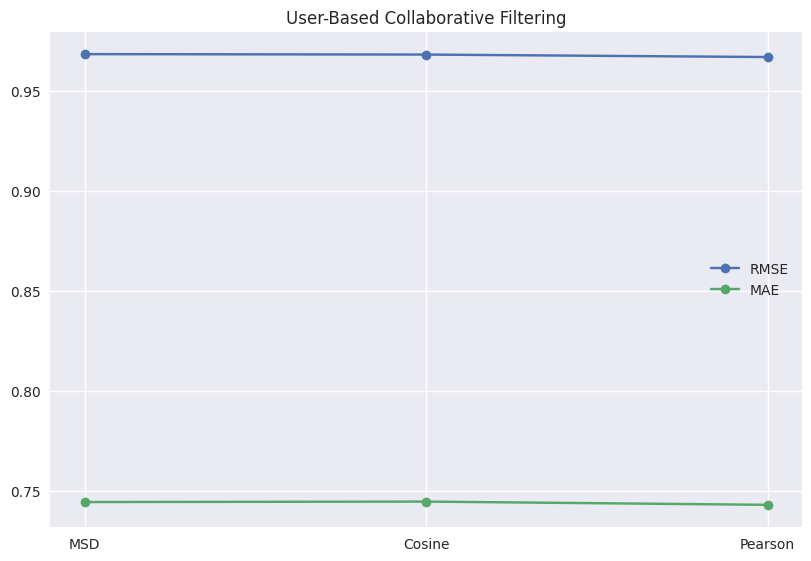

In [166]:
fig, ax = plt.subplots()
x_axis = ["MSD", "Cosine", "Pearson"]
ax.set_title("User-Based Collaborative Filtering")
ax.plot(x_axis, ub_rmse, label="RMSE", marker="o")
ax.plot(x_axis,ub_mae, label="MAE", marker="o")
ax.legend()

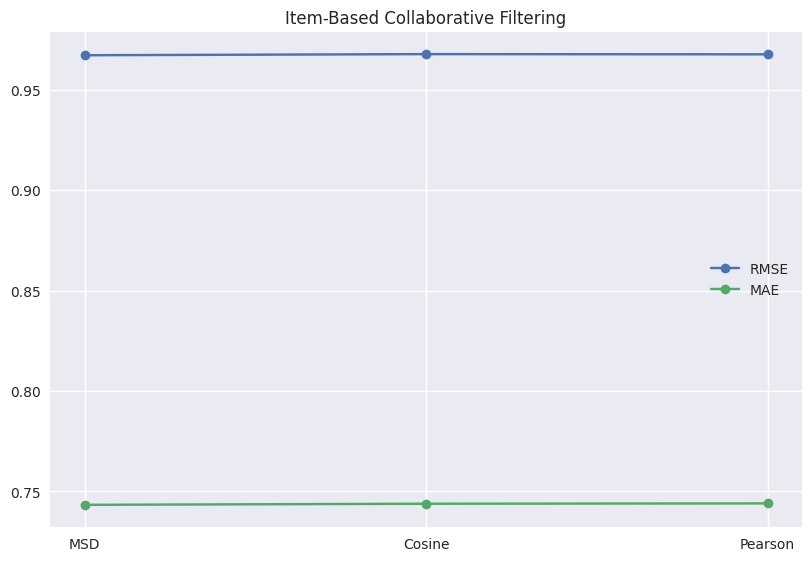

In [167]:
fig, ax = plt.subplots()
ax.set_title("Item-Based Collaborative Filtering")
ax.plot(x_axis, ib_rmse, label="RMSE", marker="o")
ax.plot(x_axis, ib_mae, label="MAE", marker="o")
ax.legend()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

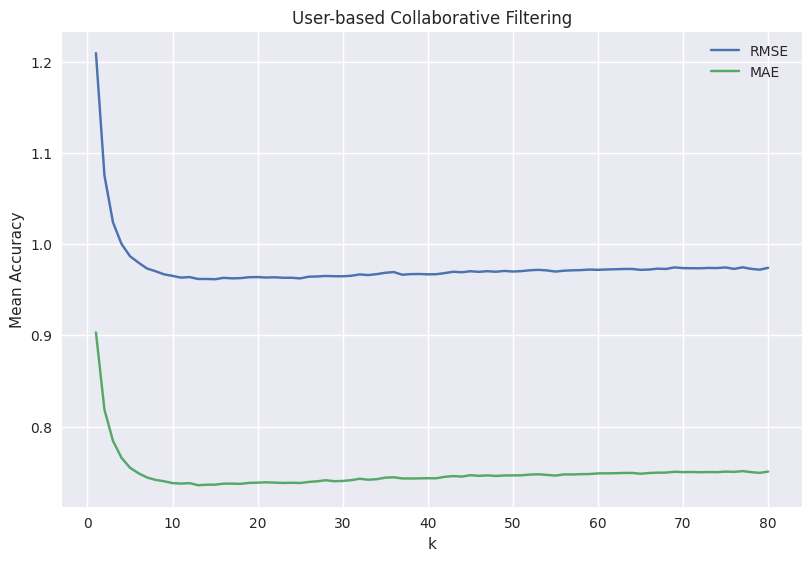

In [170]:
# Plotting Mean RMSE Accuracy and MAE Mean Accuracy
# using different values of k for user-based
# collaborative filtering.
sim_options = {
    "user_based": True
}

k_vals = range(1, 81)
rmse_means = []
mae_means = []
for k in k_vals:
    print(k)
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv = cross_validate(algo, data, measures=['rmse', 'mae'], cv=5)
    rmse_mean = cv["test_rmse"].mean()
    rmse_means.append(rmse_mean)
    mae_mean = cv["test_mae"].mean()
    mae_means.append(mae_mean)

fig, ax = plt.subplots()
ax.set_title("User-based Collaborative Filtering")
ax.set_xlabel("k")
ax.set_ylabel("Mean Accuracy")
ax.plot(k_vals, rmse_means, label='RMSE')
ax.plot(k_vals, mae_means, label='MAE')
ax.legend()

In [171]:
rmse_means.index(min(rmse_means))

(14, 12)

1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
2
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
3
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done c

ValueError: x and y must have same first dimension, but have shapes (80,) and (0,)

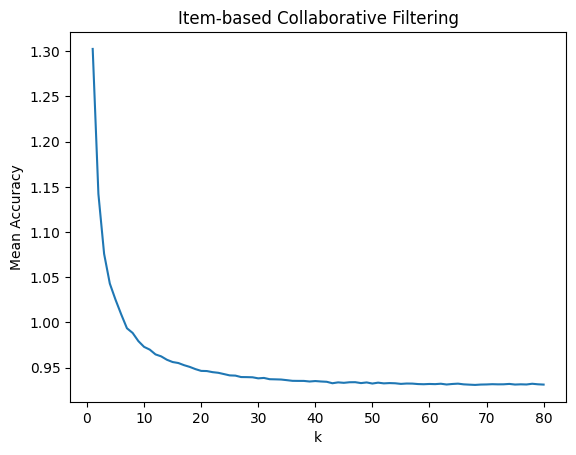

In [5]:
# Plotting Mean RMSE Accuracy and MAE Mean Accuracy
# using different values of k for item-based
# collaborative filtering.
sim_options = {
    "user_based": False
}
k_vals = range(1, 81)
rmse_means = []
mae_means = []
for k in k_vals:
    print(k)
    algo = KNNBasic(k=k, sim_options=sim_options)
    cv = cross_validate(algo, data, measures=['rmse'], cv=5)
    rmse_mean = cv["test_rmse"].mean()
    rmse_means.append(rmse_mean)

fig, ax = plt.subplots()
ax.set_title("Item-based Collaborative Filtering")
ax.set_xlabel("k")
ax.set_ylabel("Mean Accuracy")
ax.plot(k_vals, rmse_means, label='RMSE')
ax.legend()

In [6]:
rmse_means.index(min(rmse_means))

67